In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
msn10 = pd.read_csv('data/msn_10_fuel_leak_signals_preprocessed.csv', sep=';')
msn11 = pd.read_csv('data/msn_11_fuel_leak_signals_preprocessed.csv', sep=';')
msn12 = pd.read_csv('data/msn_12_fuel_leak_signals_preprocessed.csv', sep=';')
msn29 = pd.read_csv('data/msn_29_fuel_leak_signals_preprocessed.csv', sep=';')
msn53 = pd.read_csv('data/msn_53_fuel_leak_signals_preprocessed.csv', sep=';')

In [3]:
combined = pd.concat([msn10, msn11, msn12, msn29, msn53])

In [4]:
# Filter for only phase 8
combined = combined[combined["FLIGHT_PHASE_COUNT"]==8.0]

In [5]:
# Filter for non null fuel used data
combined = combined[combined["FUEL_USED_2"].notnull()]

The structure of the plane wing is such that FT1 and FT4 are on equal parts of the wing, and FT2 and FT3 are on equal parts of the wing. These are the two pairs that should therefore be compared.
Starting here with fuel use by the engines.

In [6]:
combined["outer_diff_used"] = (combined["FUEL_USED_4"] - combined["FUEL_USED_1"]).abs()
combined["inner_diff_used"] = (combined["FUEL_USED_3"] - combined["FUEL_USED_2"]).abs()

<Axes: xlabel='outer_diff_used', ylabel='Count'>

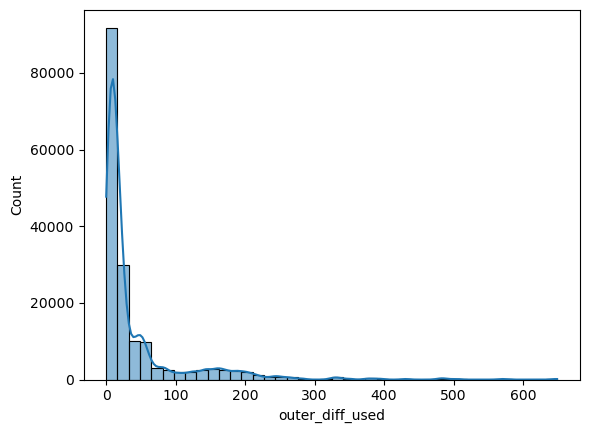

In [18]:
sns.histplot(combined["outer_diff_used"], bins=40, kde=True)

<Axes: xlabel='inner_diff_used', ylabel='Count'>

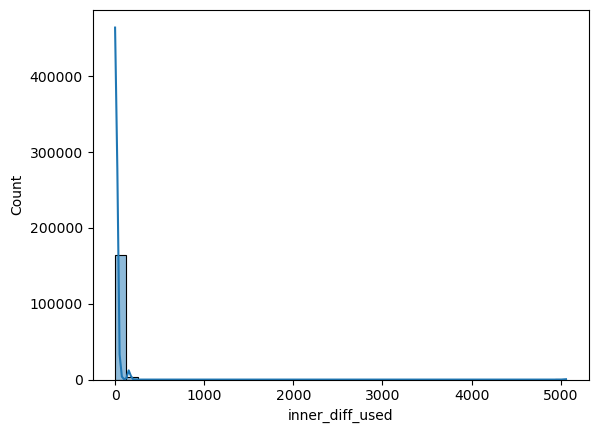

In [19]:
sns.histplot(combined["inner_diff_used"], bins=40, kde=True)

Then we will do fuel on board.

In [11]:
combined["diff_FOB"] = ((combined["VALUE_FUEL_QTY_FT1"] + combined["VALUE_FUEL_QTY_FT2"] + combined["VALUE_FUEL_QTY_LXT"]) - (combined["VALUE_FUEL_QTY_FT3"] + combined["VALUE_FUEL_QTY_FT4"] + combined["VALUE_FUEL_QTY_RXT"])).abs()

In [12]:
combined.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN,outer_diff_used,inner_diff_used,diff_FOB
1489633,2015-07-21 03:51:31,2454.501465,2444.412842,2481.687988,336.0,30967.0,0.0,1918.0,2620.0,2604.0,1920.0,10939.0,10967.0,8.0,2445.828857,988.0,F-RBAD,35.859131,10.088623,14.0
2802285,2016-10-29 08:30:11,79.641632,73.209457,71.272255,1785.0,24325.0,0.0,1818.0,2506.0,2438.0,1753.0,7898.0,7914.0,8.0,78.436935,1772.0,F-RBAD,7.164680,6.432175,117.0
2802286,2016-10-29 08:30:12,79.764977,73.332397,71.396461,1840.0,24325.0,0.0,1819.0,2505.0,2439.0,1752.0,7897.0,7915.0,8.0,78.558754,1772.0,F-RBAD,7.162292,6.432579,115.0
2802287,2016-10-29 08:30:13,79.862244,73.441658,71.505798,1890.0,24311.0,0.0,1821.0,2508.0,2436.0,1751.0,7896.0,7912.0,8.0,78.666725,1772.0,F-RBAD,7.160927,6.420586,126.0
2802288,2016-10-29 08:30:14,79.986839,73.550957,71.629326,1935.0,24294.0,0.0,1821.0,2510.0,2432.0,1750.0,7892.0,7900.0,8.0,78.788261,1772.0,F-RBAD,7.158936,6.435883,141.0


<Axes: xlabel='diff_FOB', ylabel='Count'>

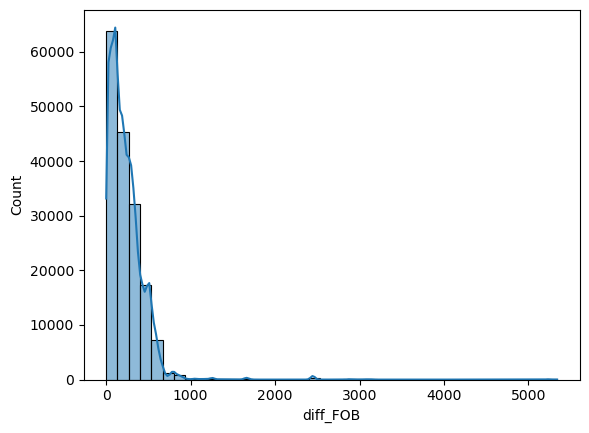

In [14]:
sns.histplot(combined["diff_FOB"], bins=40, kde=True)

In [35]:
combined["diff_FOB"].mean()

234.50912280077983

Research on the typical fuel leak

In [ ]:
#here